In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/Users/rajpetlu/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


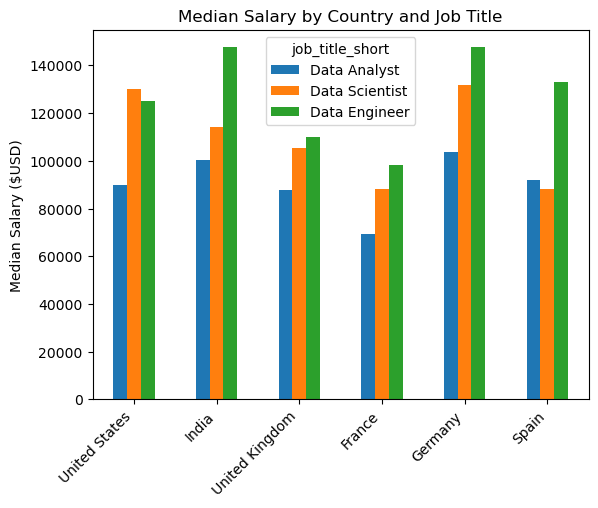

In [14]:
top_countries = df['job_country'].value_counts().head(6).index

df_salary_countrywise = df.pivot_table(
    values = 'salary_year_avg',
    index = 'job_country', 
    columns = 'job_title_short', 
    aggfunc='median')

df_salary_countrywise = df_salary_countrywise.loc[top_countries]
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_salary_countrywise = df_salary_countrywise[job_titles]
df_salary_countrywise.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')  
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df.pivot_table(values = 'salary_year_avg', index = 'job_country', columns = 'job_title_short', aggfunc='median')

In [6]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [ ]:
df_can